In [4]:
import katdal
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pickle

In [5]:
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480934843.h5'
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480936523.h5'
filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480940003.h5'

In [6]:
h = katdal.open(filename)

In [7]:
print h

Name: /var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480940003.h5 (version 3.0)
Observer: Buntu  Experiment ID: 20161205-0018
Description: 'Generic Phaseup for all targets'
Observed from 2016-12-05 14:13:24.982 SAST to 2016-12-05 14:18:44.847 SAST
Dump rate / period: 0.25011 Hz / 3.998 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m006,m007,m008,m010,m014,m015,m025,m031,m062,m063  20      220
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 L    bc856M4k   1284.000         856.000           4096       208.984
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m008', 'm010', 'm007', 'm014', 'm006', 'm063', 'm015', 'm025', 'm031', 'm062']
  spw=0
-------------------------------------------------------------------------------
Shape: (80 dumps, 4096 channels, 220 correlation product

In [8]:
# check what cal products we have
print 'Solutions:'
print '    Product             Number of solutions'
for k in h.file['TelescopeState'].keys():
    if 'cal_product' in k:
        print '   ', k, ' --- ' , len(h.file['TelescopeState'][k])

Solutions:
    Product             Number of solutions
    cal_product_B  ---  1
    cal_product_K  ---  1
    cal_product_G  ---  2


In [9]:
np.set_printoptions(precision=4,suppress=True)

In [10]:
# check antenna ordering
print h.file['TelescopeState']['cal_antlist']
a_list=[]
aa=h.file['TelescopeState']['cal_antlist']
for i,ai in enumerate(aa):
    a_list.append(pickle.loads(ai[1]))
a_array=np.array(a_list)
print a_list
print a_array[0]
labels=a_array[0]

<HDF5 dataset "cal_antlist": shape (1,), type "|V136">
[['m006', 'm007', 'm008', 'm010', 'm014', 'm015', 'm025', 'm031', 'm062', 'm063']]
['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm025' 'm031' 'm062' 'm063']


# Delays

In [11]:
k = h.file['TelescopeState']['cal_product_K']
k_list = []
for i, ki in enumerate(k):
    k_list.append(pickle.loads(ki[1]))
k_array = np.array(k_list)

k_0 = k_array[:,0,:]*1e9
k_1 = k_array[:,1,:]*1e9

In [12]:
k_array.shape #Times,Pols,Antennas

(1, 2, 10)

In [13]:
# print delays (if there are few delays)
print 'POL 0: \n', k_0[0], "\n",k_0[-1]
print 'POL 1: \n', k_1[0],"\n" ,k_1[-1]

POL 0: 
[-386.1889 -407.8249 -378.3016 -389.2391 -385.8379 -385.8223    0.
  234.1868 -376.5056 -383.1252] 
[-386.1889 -407.8249 -378.3016 -389.2391 -385.8379 -385.8223    0.
  234.1868 -376.5056 -383.1252]
POL 1: 
[-383.0952 -404.8834 -374.5716 -382.8046 -381.0223 -382.8783    0.
  238.1648 -377.1171 -380.2113] 
[-383.0952 -404.8834 -374.5716 -382.8046 -381.0223 -382.8783    0.
  238.1648 -377.1171 -380.2113]


In [14]:
print labels

['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm025' 'm031' 'm062' 'm063']


In [15]:
colors=['r','g','b','c','m','k','darkorange','darkgreen','maroon','darkviolet','olive','saddlebrown','darkorchid']

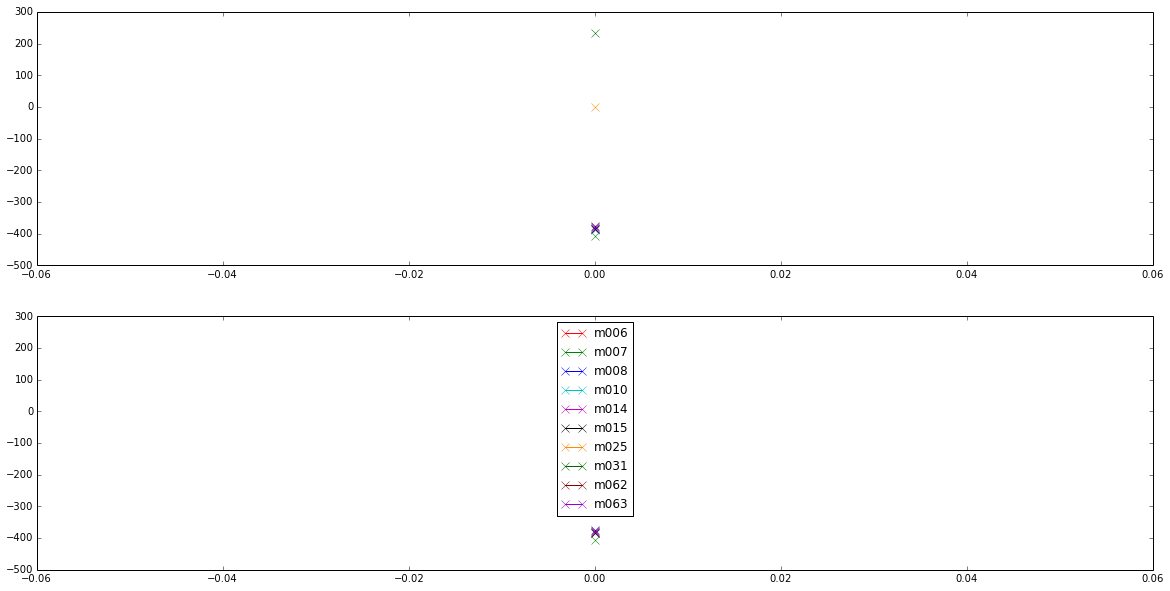

In [16]:
#plot delays (if there are many delays)
fig, ax = plt.subplots(2,1,figsize=(20, 10))
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center')

# Gains

In [17]:
g = h.file['TelescopeState']['cal_product_G']
g_list = []
for i, gi in enumerate(g):
    g_list.append(pickle.loads(gi[1]))
g_array = np.array(g_list)
print g_array.shape

g_0 = g_array[:,0,:]
g_1 = g_array[:,1,:]

(2, 2, 10)


In [18]:
#First
print np.abs(g_0)[0]
print np.abs(g_1)[0]

[ 1.0026  1.0002  1.0002  0.9971  1.0003  1.0007  1.0014  0.9997  0.9995
  1.    ]
[ 1.0021  1.0008  1.0006  1.0007  1.0008  0.9988  0.9987  0.9987  0.9999
  1.0003]


In [19]:
#Last
print np.abs(g_0)[-1]
print np.abs(g_1)[-1]

[ 0.9994  0.9969  0.9942  0.9961  1.      1.0004  0.9997  0.9987  1.
  0.9996]
[ 1.0006  0.9986  0.9978  1.0001  1.0012  0.9981  0.9979  0.9989  1.0004
  0.9995]


In [20]:
#Ratio
print np.abs(g_0)[-1]/np.abs(g_0)[0]
print np.abs(g_1)[-1]/np.abs(g_1)[0]

[ 0.9969  0.9967  0.994   0.999   0.9997  0.9997  0.9984  0.999   1.0005
  0.9996]
[ 0.9985  0.9978  0.9972  0.9994  1.0004  0.9993  0.9992  1.0002  1.0004
  0.9991]


In [21]:
#Before
print np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[0])

[  64.0019   78.6362  121.1728   60.5294  141.1682   77.0961    0.
    0.0564  127.0051   94.1453]
[  45.5652   92.9746   77.657    74.8328   85.0376   66.3706    0.
   50.2491   69.224   107.8749]


In [22]:
#After
print np.rad2deg(np.angle(g_0)[-1])
print np.rad2deg(np.angle(g_1)[-1])

[  63.9037   78.9373  120.8101   59.4866  139.4622   75.271     0.
   -0.8396  126.474    93.5853]
[  45.5332   93.2783   77.3241   73.9491   83.3566   64.6616    0.
   49.4382   68.7045  107.4585]


In [23]:
#Differences
print np.rad2deg(np.angle(g_0)[-1])-np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[-1])-np.rad2deg(np.angle(g_1)[0])

[-0.0982  0.3011 -0.3627 -1.0428 -1.706  -1.825  -0.     -0.896  -0.5311
 -0.5599]
[-0.032   0.3037 -0.3329 -0.8837 -1.681  -1.7091 -0.     -0.8109 -0.5196
 -0.4164]


/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


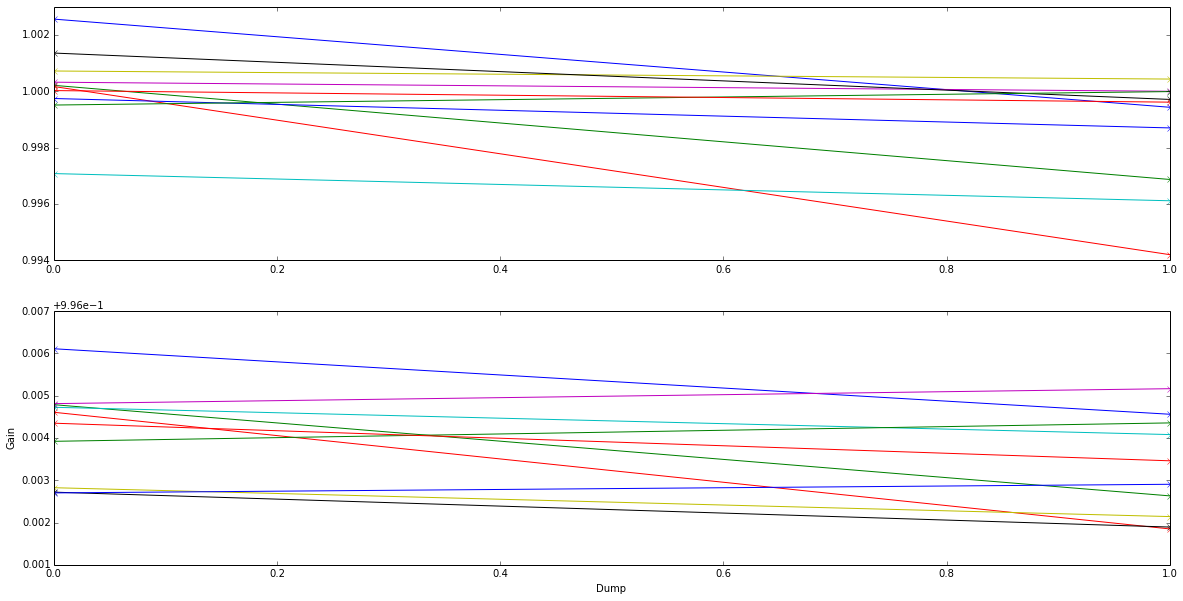

In [24]:
#plot gains - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(g_0),'-x');
#ax[0].set_ylim([0,5.0]);
ax[1].plot(np.abs(g_1),'-x');
#ax[1].set_ylim([0,5.0]);
plt.xlabel('Dump')
plt.ylabel('Gain')
plt.legend()

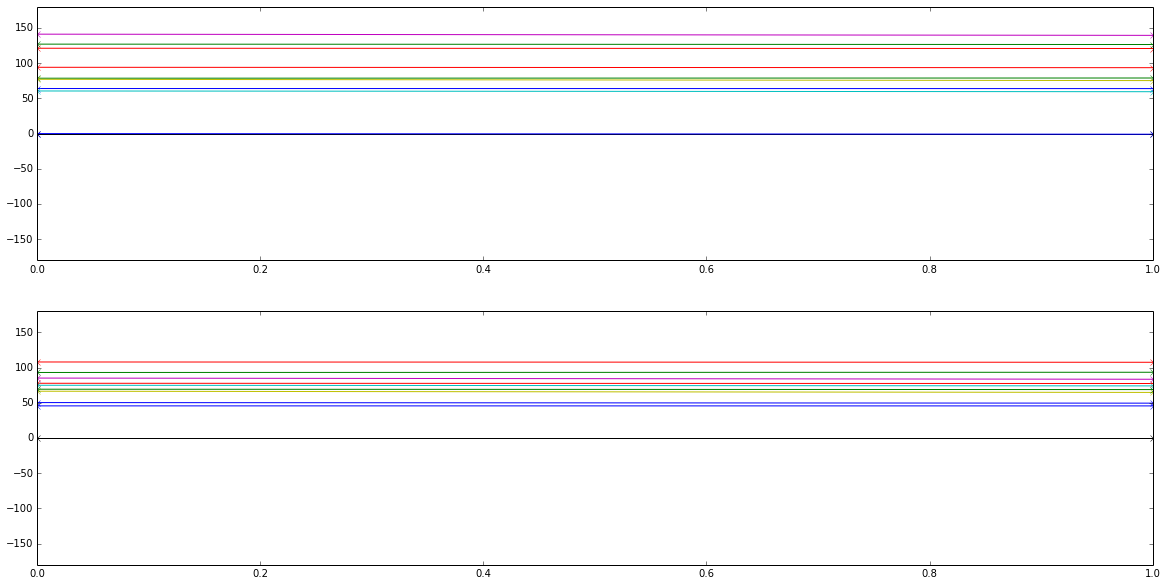

In [25]:
#plot gains - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(g_0)),'-x');
ax[0].set_ylim([-180,180]);
ax[1].plot(np.rad2deg(np.angle(g_1)),'-x');
ax[1].set_ylim([-180,180]);

# Bandpasses    

In [26]:
b = h.file['TelescopeState']['cal_product_B']
b_list = []
for i, bi in enumerate(b):
    b_list.append(pickle.loads(bi[-1]))
b_array = np.array(b_list)
print b_array.shape
# bandpass shape is ntimes x channels x pol x antenna 
# where ntimes is the number of bandpasses

# just look at LAST bandpass for now
b_0_0 = b_array[-1,:,0,:]
b_1_0 = b_array[-1,:,1,:]



(1, 4096, 2, 10)


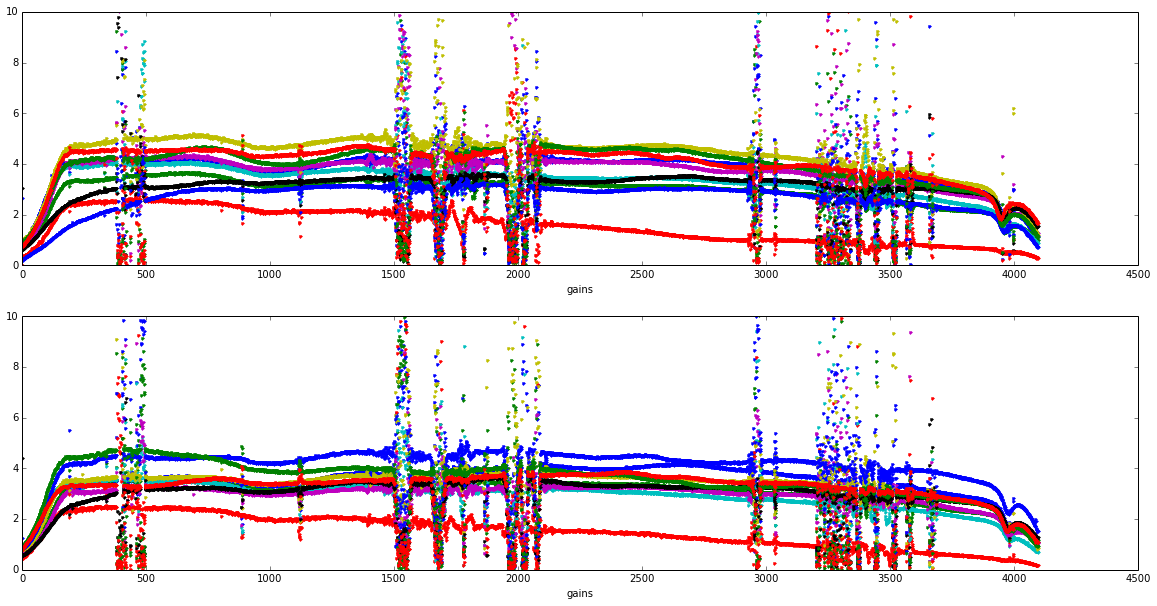

In [27]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_0),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_0),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

In [28]:
""""
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center')
"""

'"\nfor i in range(len(labels)):\n    ax[0].plot(k_0[:,i],\'-x\',markersize=8,label=labels[i],color=colors[i]);\n#ax[0].set_ylim([-0.2,0.2]);\n    ax[1].plot(k_1[:,i],\'-x\',markersize=8,label=labels[i],color=colors[i]);\n#ax[1].set_ylim([-0.2,0.2]);\nplt.legend(loc=\'upper center\')\n'

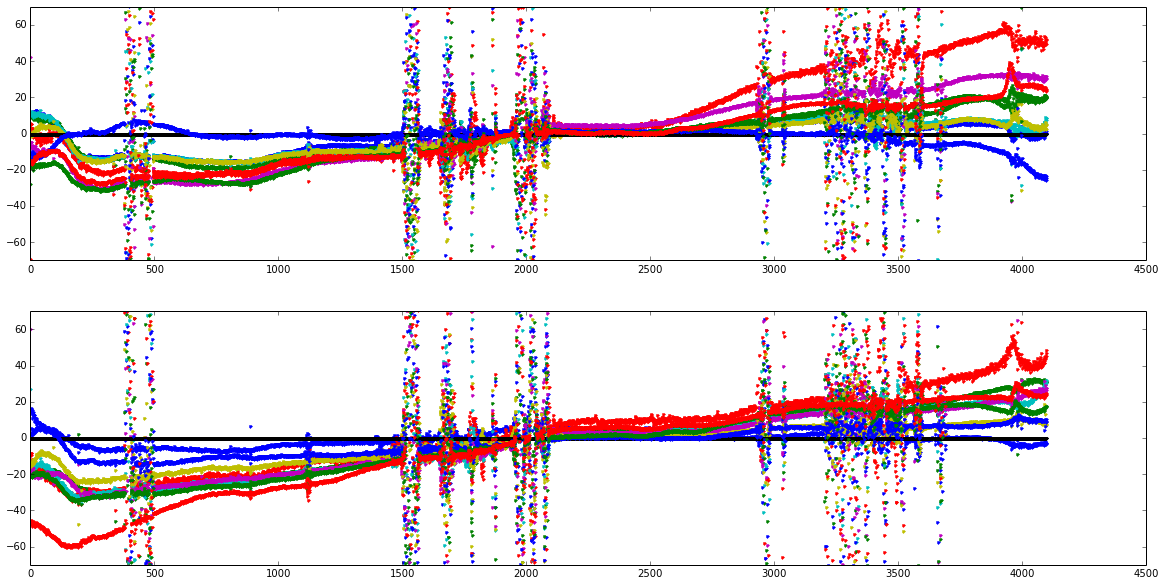

In [29]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].set_ylim([-70,70]);
ax[1].set_ylim([-70,70]);
ax[0].plot(np.rad2deg(np.angle(b_0_0)),'.');
ax[1].plot(np.rad2deg(np.angle(b_1_0)),'.');
plt.legend()

In [30]:
len(labels)

10

In [31]:
b_array.shape
# Time,channels,pols,antennas

(1, 4096, 2, 10)

In [32]:
#One bandpass at the END
antn=9
b_0_1 = b_array[-1,:,0,antn]
b_1_1 = b_array[-1,:,1,antn]
print b_1_1.shape
print a_array[:,antn]

(4096,)
['m063']


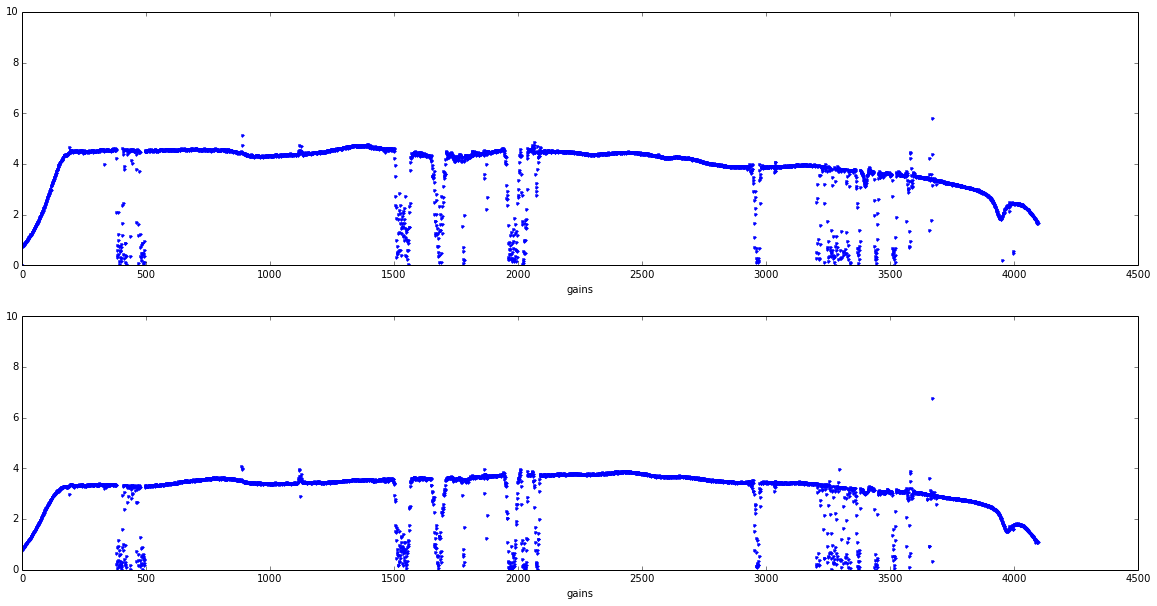

In [33]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_1),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_1),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

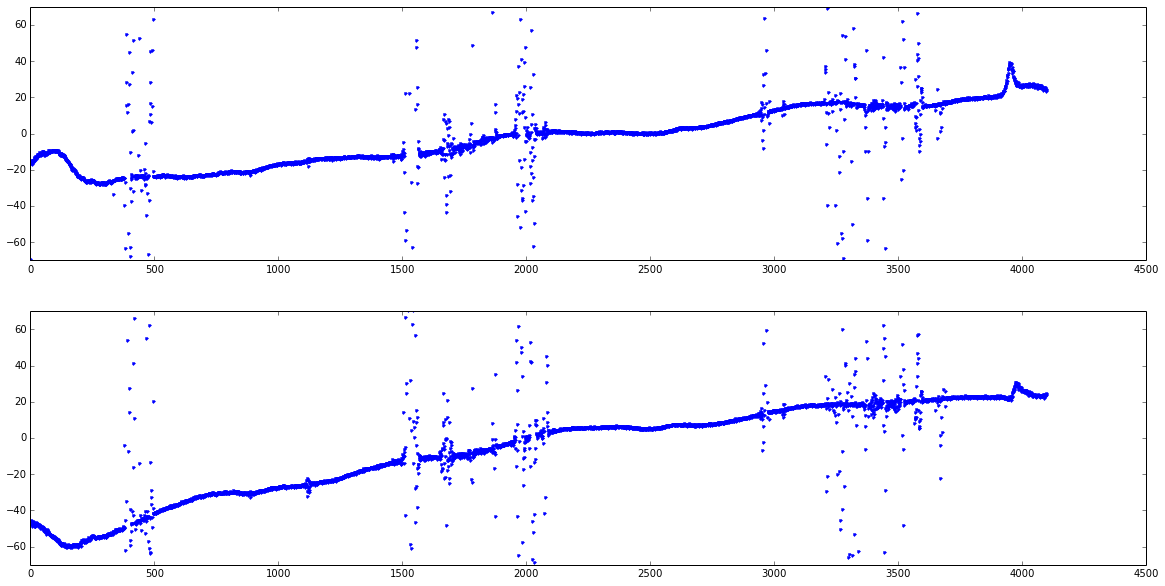

In [34]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_1)),'.');
ax[0].set_ylim([-70,70]);
ax[1].plot(np.rad2deg(np.angle(b_1_1)),'.');
ax[1].set_ylim([-70,70]);